In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image
from datetime import date

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]
N_year = len(Years)

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)

# Levs    = [100, 75, 65, 55, 40, 30]
# Heights = [16, 18, 19, 20, 22, 24]
Levs    = [100, 75, 65, 55, 47, 40, 30] # hPa
Heights = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km
# [100, 75, 55, 40, 30]


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = len(Levs) # 16, 18, 20, 22, 24 km

Lats_edge, Lons_edge, Lats_mid, Lons_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 30,
 36,
 180)

In [4]:
# count the particle (injected at different height) number in each grid cell
N_day  = 20*366
Num_2D = np.zeros((N_lat, N_lon, N_lev, N_day)) 

In [5]:
for i_year in tqdm(range(N_year)):
    
    NUMs = np.zeros((N_lon*N_lat*N_day, N_lev))
    
    
    # 6 injection altitudes
    # File1 = open('/n/home12/hongwei/Paper_2/Plot_python/Num_Concnt/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    File1 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    # File = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')

    Lines1 = File1.readlines()
    
    ii = 0
    for line1 in Lines1:
        a1 = line1.split(',')
        NUMs[ii,0] = float(a1[3])
        NUMs[ii,1] = float(a1[4])
        NUMs[ii,2] = float(a1[5])
        NUMs[ii,3] = float(a1[6])
        NUMs[ii,5] = float(a1[7])
        NUMs[ii,6] = float(a1[8])
        ii = ii+1
        
    # 21-km injection (only 19 km is needed here, 21-km is never used in the following)
    File2 = open('/n/home12/hongwei/HONGWEI/Paper_2/Plot_python/21km_post_process/Num_Concnt_21km/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    # File2 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    Lines2 = File2.readlines()
    
    ii = 0
    for line2 in Lines2:
        a2 = line2.split(',')
        NUMs[ii,4] = float(a2[3])
        ii = ii+1        

        
    # remap to global (Lon,Lat) mesh
    Num_2D_temp = np.zeros((N_lat, N_lon, N_lev, N_day)) 
    for i_day in range(N_day):
        for ix in range(N_lon):
            for iy in range(N_lat):
                ii = i_day*(N_lat*N_lon) + ix*N_lat + iy
                Num_2D_temp[iy, ix, :, i_day] = NUMs[ii,:]
               
            
    Num_2D = Num_2D + Num_2D_temp            
    
print(ii)

100%|██████████| 10/10 [03:40<00:00, 22.07s/it]

7905599


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!

In [6]:
# change (-20,20) to (20,-20)

print("LAT Before: ", Lats_mid)

if Lats_mid[0]<Lats_mid[-1]:
    Lats_edge = Lats_edge[::-1]
    Lats_mid = Lats_mid[::-1]
    Num_2D[:, :, :, :] = Num_2D[::-1, :, :, :]

print("LAT After: ", Lats_mid)


LAT Before:  [-87 -81 -75 -69 -63 -57 -51 -45 -39 -33 -27 -21 -15  -9  -3   3   9  15
  21  27  33  39  45  51  57  63  69  75  81  87]
LAT After:  [ 87  81  75  69  63  57  51  45  39  33  27  21  15   9   3  -3  -9 -15
 -21 -27 -33 -39 -45 -51 -57 -63 -69 -75 -81 -87]


In [7]:
print(Num_2D.shape)
total_num_day = np.sum( Num_2D, axis=(0,1) )

(30, 36, 7, 7320)


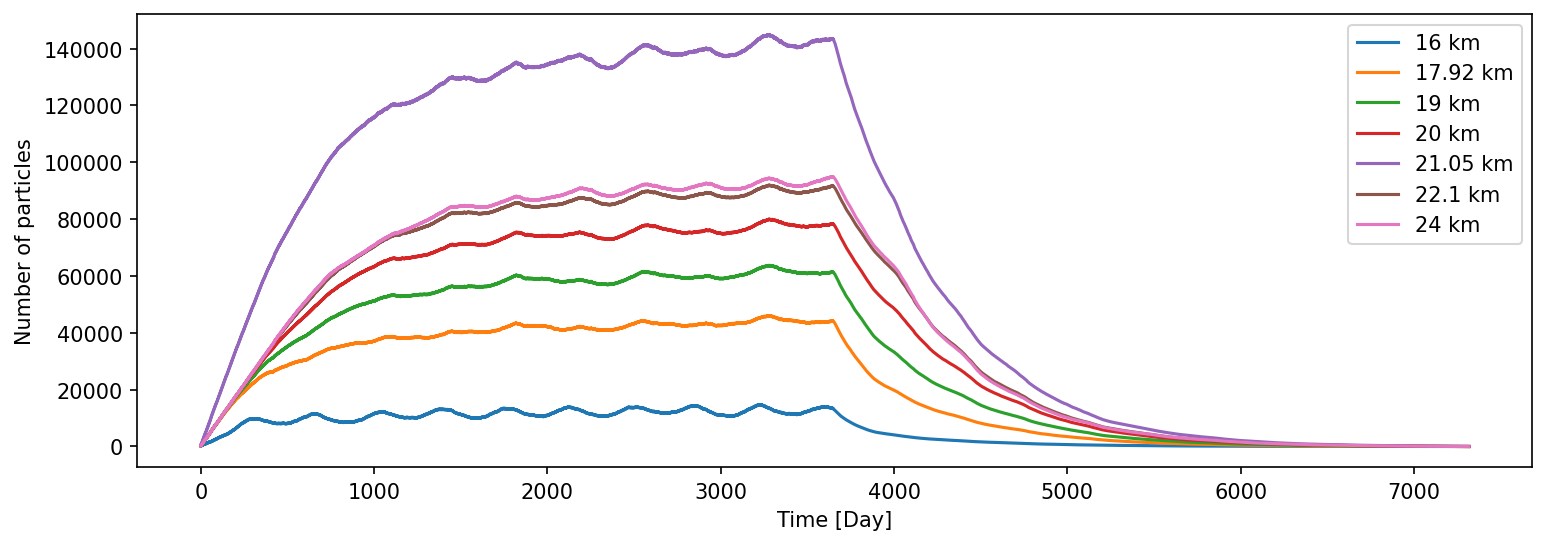

In [8]:
#------------------------------------------------------------------
# plot the time series of the total particle number

iday_begin = 0
iday_end = -1

#
fig = plt.figure(figsize=(12,4), dpi=150)

plt.plot(total_num_day[0,iday_begin:iday_end], label=f"{Heights[0]} km")
plt.plot(total_num_day[1,iday_begin:iday_end], label=f"{Heights[1]} km")
plt.plot(total_num_day[2,iday_begin:iday_end], label=f"{Heights[2]:.0f} km")
plt.plot(total_num_day[3,iday_begin:iday_end], label=f"{Heights[3]:.0f} km")
plt.plot(total_num_day[4,iday_begin:iday_end], label=f"{Heights[4]} km")
plt.plot(total_num_day[5,iday_begin:iday_end], label=f"{Heights[5]} km")
plt.plot(total_num_day[6,iday_begin:iday_end], label=f"{Heights[6]} km")

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Time [Day]")
plt.ylabel("Number of particles")

plt.legend();

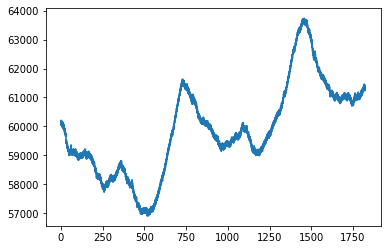

In [9]:
#  get 2005.1 - 2009.12

# 19 km
# Num_Month_19km = total_num_month[2,5*12:10*12]

day1 = 5*365
day2 = 10*365

Num_day_19km_5yr = total_num_day[2,day1:day2]

plt.plot(Num_day_19km_5yr);

In [10]:
# monthly data
# To simplify, assume all months have 30 days

N_month = 20*12

Num_2D_month = np.zeros((N_lat, N_lon, N_lev, N_month))

for i_mon in range(N_month):
    Num_2D_month[:,:,:,i_mon] = np.mean(Num_2D[:,:,:,i_mon*30:(i_mon+1)*30], axis=3)
    
total_num_month = np.sum( Num_2D_month, axis=(0,1) )

In [11]:
# half monthly data
# To simplify, assume all months have 30 days

N_HalfMonth = 20*12*2

Num_2D_HalfMonth = np.zeros((N_lat, N_lon, N_lev, N_HalfMonth))

for i_mon in range(N_HalfMonth):
    Num_2D_HalfMonth[:,:,:,i_mon] = np.mean(Num_2D[:,:,:,i_mon*15:(i_mon+1)*15], axis=3)
    
total_num_HalfMonth = np.sum( Num_2D_HalfMonth, axis=(0,1) )

# 3. PyCWT

https://pycwt.readthedocs.io/en/latest/tutorial.html#time-series-spectral-analysis-using-wavelets

In [12]:
import numpy
from matplotlib import pyplot
import scipy.signal as Signal

import pycwt as wavelet
from pycwt.helpers import find

In [13]:
iz = 2

day1 = 5*365
day2 = 10*365+1
df_nino = np.array(total_num_day[iz,day1:day2])

# imon_begin = 12*5 # 2005
# imon_end = 12*10+1 # 2010
# df_nino = np.array(total_num_month[iz,imon_begin:imon_end])

dat0 = df_nino
dat0 = dat0 - np.mean(dat0)
dat0 = Signal.detrend(dat0)
# dat = np.hstack((dat0, dat0)) #to get the scalar values
dat = dat0

title = 'Number of particles in the stratosphere'
label = 'Particle number'
units = '#'

t0 = 2005
dt = 1/365 # [year]
# dt = 1/12

N = len(dat)
t = np.arange(0, N) * dt + t0

# scales = np.arange(1, 128) #set the wavelet scales
print(f'dt should be changed based on daily or monthly data')

dt should be changed based on daily or monthly data


1826

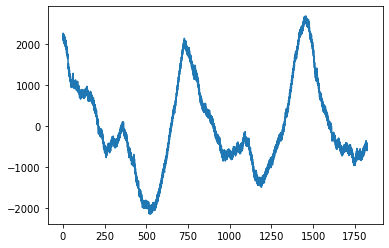

In [14]:
plt.plot(dat)
N

In [15]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

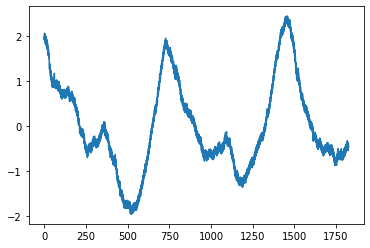

In [16]:
plt.plot(dat_norm)

In [17]:
mother = wavelet.Morlet(6)
# s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
s0 = 1/4

dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [18]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [19]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [20]:
power /= scales[:, None]

In [21]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [22]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [23]:
# yr1 = 1
# yr2 = 3

# sel = find((period >= yr1) & (period < yr2))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

<ipython-input-51-6a1a7d0e7600>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_xticklabels([2005,2006,2007,2008,2009,2010], fontsize=12);


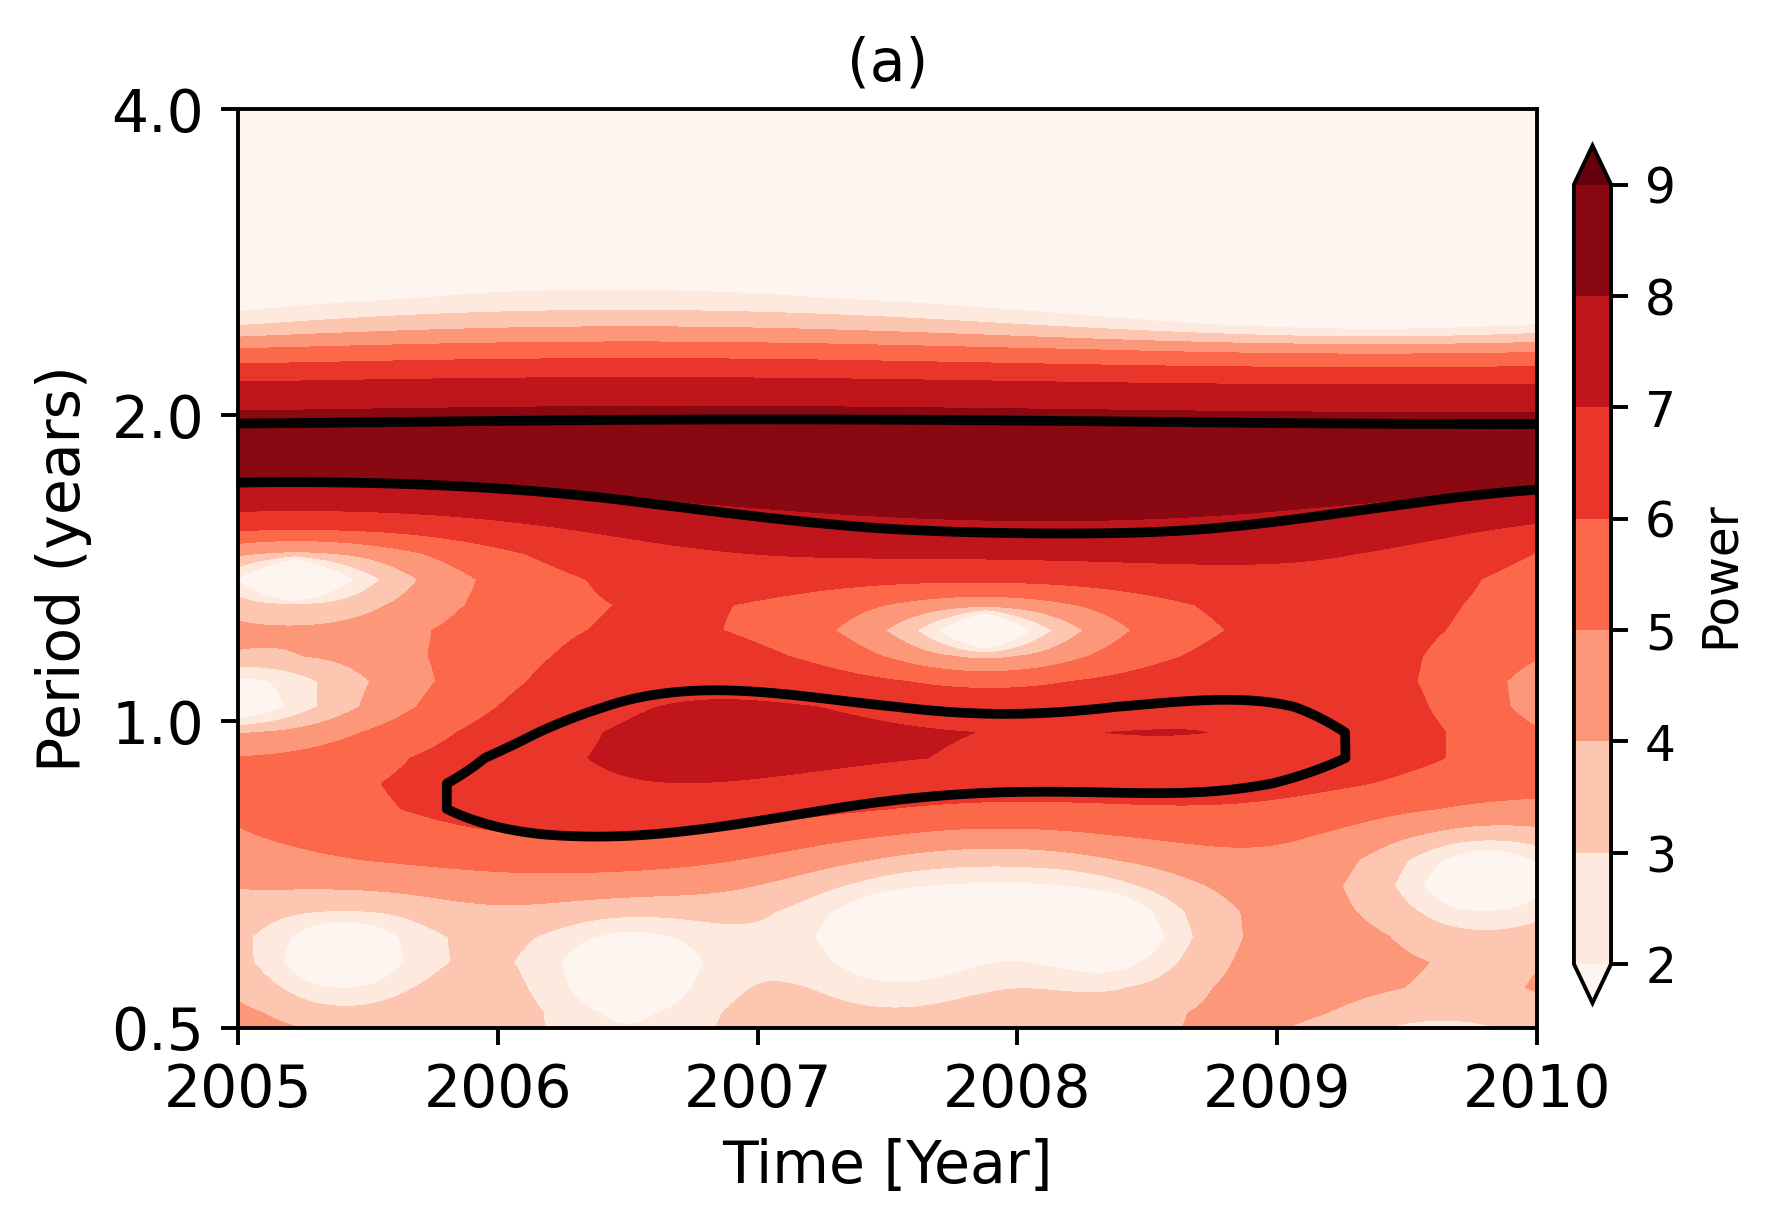

In [51]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()

figprops = dict(figsize=(5.3, 3.5), dpi=350)
fig = pyplot.figure(**figprops)

t0 = 0
t1 = int(len(t))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.17, 0.15, 0.70, 0.75])
# levels = [1, 2, 4, 8, 16, 32, 64]
levels = [4, 8, 16, 32, 64, 128, 256, 512]

im = bx.contourf(t[t0:t1], numpy.log2(period), numpy.log2(power[:,t0:t1]), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.Reds) # plt.cm.Reds
cbar_ax = fig.add_axes([0.89, 0.17, 0.02, 0.70])
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label='Power')



extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t[t0:t1], numpy.log2(period), sig95[:,t0:t1], [-99, 1], colors='k', linewidths=2,
           extent=extent)

# bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
#                            t[:1] - dt, t[:1] - dt]),
#         numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
#                            numpy.log2(period[-1:]), [1e-9]]),
#         'k', alpha=0.3, hatch='x')

bx.set_title('(a)', fontsize=12)
bx.set_ylabel('Period (years)', fontsize=12)
bx.set_xlabel('Time [Year]', fontsize=12)

#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(0.5)),
                           numpy.ceil(numpy.log2(4.1)))
# Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
#                            numpy.ceil(numpy.log2(period.max())))

bx.set_ylim( numpy.ceil(numpy.log2(0.5)), numpy.ceil(numpy.log2(4.0)) )
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks, fontsize=12);
bx.set_xticklabels([2005,2006,2007,2008,2009,2010], fontsize=12);

pyplot.savefig("Figure_2a.jpg")

# cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
# bx.colorbar(cax=bx, orientation="vertical", label='Power')

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.

# cx = pyplot.axes([1, 0, 0.5, 1], sharey=bx)

# cx.plot(glbl_signif, numpy.log2(period), 'k-') # significant contour line

# # cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc') 
# # cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
# #         linewidth=1.)

# cx.plot(var * glbl_power, numpy.log2(period), 'r--', linewidth=1.5)

# cx.set_title('c) Global Wavelet Spectrum')
# cx.set_xlabel(r'Power [({})^2]'.format(units))
# # cx.set_xlim([0, numpy.log2(glbl_power.max()) + numpy.log2(var])
# # cx.set_ylim(numpy.log2([period.min(), period.max()]))
# cx.set_yticks(numpy.log2(Yticks))
# cx.set_yticklabels(Yticks)
# pyplot.setp(cx.get_yticklabels(), visible=False);



In [25]:
t.shape, period.shape, power.shape, sig95.shape

((1826,), (85,), (85, 1826), (85, 1826))

In [26]:
power.max()

398.3266571146855

In [27]:
    scale0 = 8*8*8*8*8*8
    numlevels = 8

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)
#         print()

    contourlevels = np.log2(levels)

# Stop Here !!!

# 1. kPyWavelet

In [ ]:
# import kPyWavelet as wavelet

In [2]:
import sys
print("Python version:", sys.version)

Python version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]


# 2. waipy

In [3]:
# !pip install waipy

  Created wheel for waipy: filename=waipy-0.1.51-py3-none-any.whl size=16790 sha256=61c081165ed4c54501538460a913661987c159d433984cde1638778997fb141f
  Stored in directory: /n/home12/hongwei/.cache/pip/wheels/cf/44/a1/383b1712fc9b559ae611ef8c14e3c214ba0306fed3c1f54f8a
Successfully built waipy


In [4]:
import waipy

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
"""    OPEN ARCHIVE .TXT/.DAT
    archive = file.txt
    dt      = data sampling
    date1   = data initial time"
"""
N =504      # the time series of length N.

dt = 1/4    # amount of time between each time series value, i.e. the sampling time.
            # seasonal data 1/4 year - 4 measures in 1 year

T1 = 1871.  # start time
# data,time = waipy.load_txt('../../lib/waipy/data/txt/sst_nino3.dat',dt,T1)
# print (len(data))


In [40]:
time = np.arange(0, N) * dt + T1

bias = np.random.randint(100, size=(1, N))
data = np.sin(time) + bias[0]/50

len(time), len(data), len(bias[0])

(504, 504, 504)

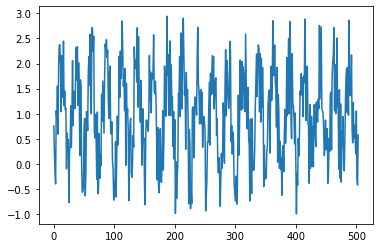

In [41]:
plt.plot(data);

In [43]:
data_norm = waipy.normalize(data)


In [44]:
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dt = 1/4.

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Nino3')
#waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)

Nr of Scales: 31
scales [0.5, 0.5946035575013605, 0.7071067811865476, 0.8408964152537145, 1.0, 1.189207115002721, 1.4142135623730951, 1.681792830507429, 2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546]


/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In f

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'NINO3 Sea Surface Temperature (seasonal)'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

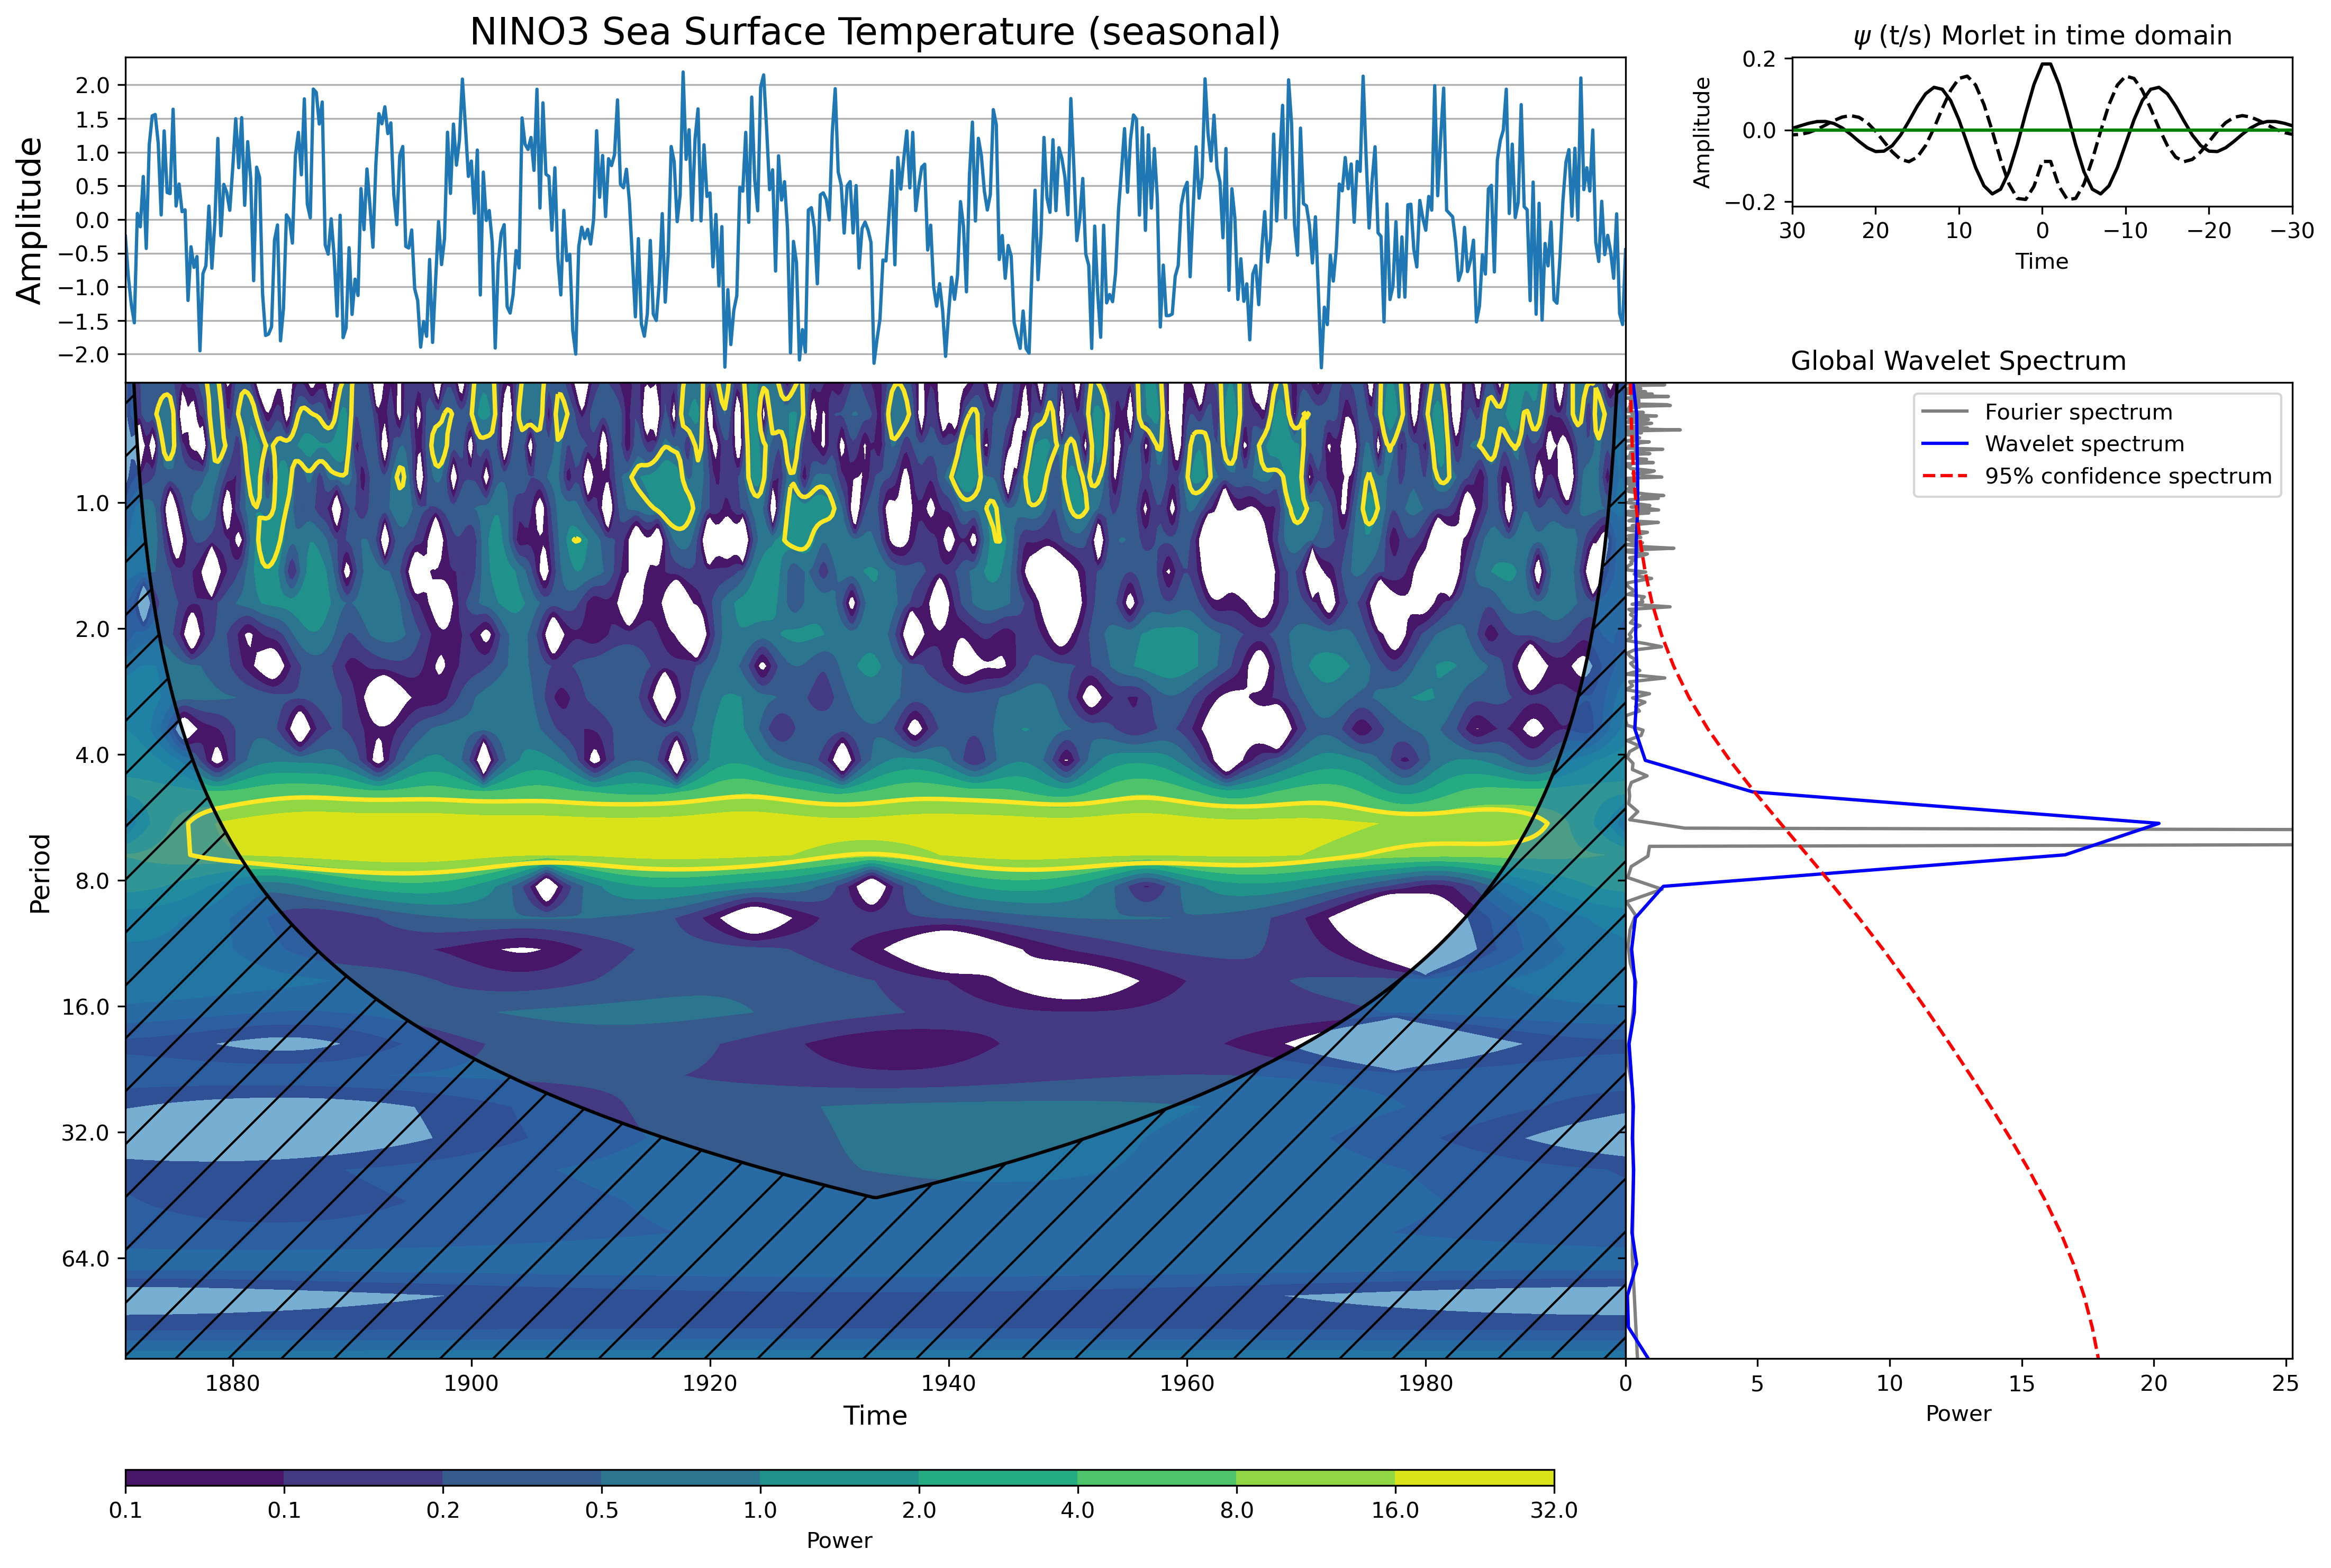

In [45]:
var='NINO3 Sea Surface Temperature (seasonal)'
#time from waipy.load_txt 
#data normalize
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result)

# 3. PyCWT

https://pycwt.readthedocs.io/en/latest/tutorial.html#time-series-spectral-analysis-using-wavelets

In [1]:
# !pip install pycwt

     |████████████████████████████████| 753 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 75.3 MB/s eta 0:00:01�██▉                            | 1.1 MB 75.3 MB/s eta 0:00:01 75.3 MB/s eta 0:00:013 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 6.7 MB/s eta 0:00:01 | 348 kB 6.7 MB/s eta 0:00:06   |█████                           | 5.5 MB 6.7 MB/s eta 0:00:05                       | 9.8 MB 6.7 MB/s eta 0:00:04MB/s eta 0:00:03
     |████████████████████████████████| 78 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 17.3 MB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 70.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 68.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling 

In [2]:
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [3]:
url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = numpy.genfromtxt(url, skip_header=19)
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1871.0
dt = 0.25  # In years

In [4]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [20]:
N

504

In [5]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [6]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [7]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [8]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [9]:
power /= scales[:, None]

In [10]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [11]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [15]:
yr1 = 1
yr2 = 4

sel = find((period >= yr1) & (period < yr2))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

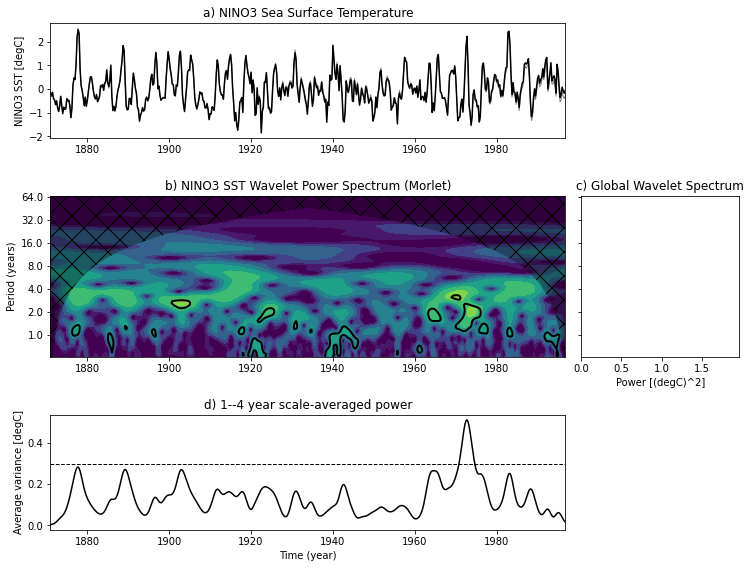

In [17]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis) 

extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)

bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')

bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--') # significant contour line
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc') 
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(yr1, yr2))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()